## Contexto:

Una empresa de logística desea optimizar las rutas de distribución de sus camiones para minimizar los costos totales de transporte. La empresa tiene un almacén central desde donde se distribuyen productos a diferentes tiendas en una región. Cada tienda tiene una demanda específica que debe ser satisfecha, y cada camión tiene una capacidad máxima de carga. Además, los costos de transporte varían dependiendo de la distancia entre el almacén y las tiendas.

## Objetivo:

Minimizar el costo total de transporte, asegurando que todas las tiendas reciban sus productos según su demanda y respetando la capacidad de los camiones.

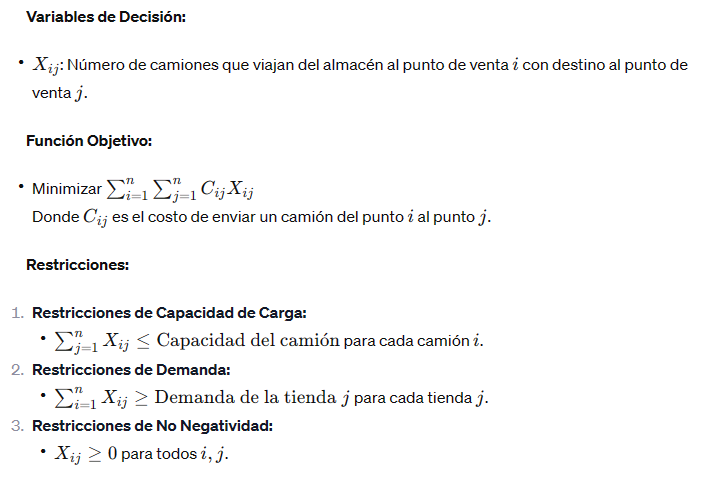

## Desarrollo del Caso:

La empresa necesita determinar cuántos camiones deben viajar entre el almacén y cada tienda, y entre tiendas, para satisfacer las demandas de cada una de manera eficiente. Al aplicar la programación lineal, se puede calcular la cantidad óptima de camiones que deben ser enviados a cada ruta para minimizar los costos totales, considerando las restricciones de capacidad y demanda.

## Estructura del archivo de excel

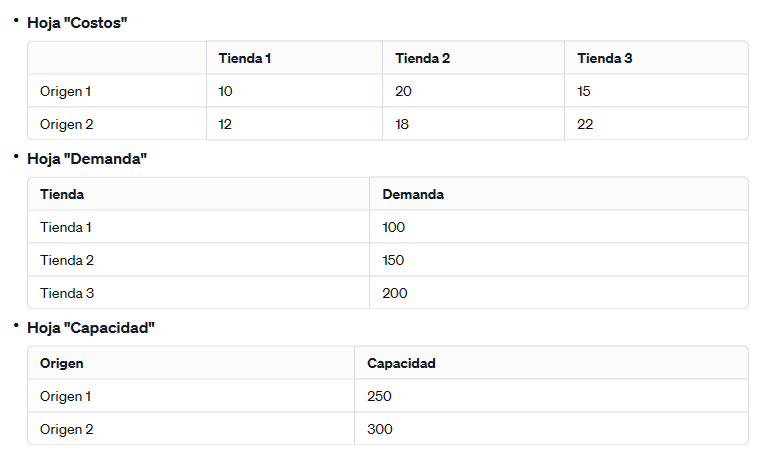

In [3]:
import pandas as pd
from scipy.optimize import linprog

# Leer datos desde Excel
def leer_datos(archivo):
    costos = pd.read_excel(archivo, sheet_name='Costos').set_index('Origen')
    demanda = pd.read_excel(archivo, sheet_name='Demanda').set_index('Tienda')
    capacidad = pd.read_excel(archivo, sheet_name='Capacidad').set_index('Origen')
    return costos, demanda, capacidad

# Configuración y solución del problema de programación lineal
def resolver_problema(costos, demanda, capacidad):
    num_rutas = costos.shape[0] * costos.shape[1]
    c = costos.values.flatten()

    A = []
    b = []

    # Restricciones de capacidad
    for origen in capacidad.index:
        restriccion = [0] * num_rutas
        for j in range(len(costos.columns)):
            restriccion[len(costos.columns) * costos.index.get_loc(origen) + j] = 1
        A.append(restriccion)
        b.append(capacidad.loc[origen, 'Capacidad'])

    # Restricciones de demanda
    for tienda in demanda.index:
        restriccion = [0] * num_rutas
        for i in range(len(costos.index)):
            restriccion[len(costos.columns) * i + costos.columns.get_loc(tienda)] = -1
        A.append(restriccion)
        b.append(-demanda.loc[tienda, 'Demanda'])

    res = linprog(c, A_ub=A, b_ub=b, method='highs')

    if res.success:
        print("Costo Total:", res.fun)
        for idx, val in enumerate(res.x):
            if val > 0:
                origen = costos.index[idx // len(costos.columns)]
                tienda = costos.columns[idx % len(costos.columns)]
                print(f'Ruta de {origen} a {tienda}: {val}')
    else:
        print("No se encontró una solución óptima")

# Ejecutar el script
archivo_excel = 'linprog.xlsx'
costos, demanda, capacidad = leer_datos(archivo_excel)
resolver_problema(costos, demanda, capacidad)


Costo Total: 6800.0
Ruta de Origen 1 a Tienda 1: 50.0
Ruta de Origen 1 a Tienda 3: 200.0
Ruta de Origen 2 a Tienda 1: 50.0
Ruta de Origen 2 a Tienda 2: 150.0


El resultado obtenido del script de programación lineal para la optimización de rutas de distribución en una empresa de logística se puede interpretar de la siguiente manera:

Costo Total: 6800.0

Esto indica que el costo total mínimo para cumplir con todas las demandas de las tiendas, respetando las capacidades de los camiones, es de 6,800 unidades monetarias (dólares, euros, etc., dependiendo de la moneda utilizada en los datos de entrada).

Rutas y Cantidad de Transporte:

Ruta de Origen 1 a Tienda 1: 50.0
Esto significa que se deben enviar 50 unidades de producto (o el equivalente a la capacidad de carga de 50 camiones, si cada unidad representa un camión) desde el Origen 1 a la Tienda 1.

Ruta de Origen 1 a Tienda 3: 200.0
Aquí, se deben enviar 200 unidades de producto desde el Origen 1 a la Tienda 3.

Ruta de Origen 2 a Tienda 1: 50.0
Esta ruta indica el envío de 50 unidades de producto desde el Origen 2 a la Tienda 1.

Ruta de Origen 2 a Tienda 2: 150.0
Finalmente, se deben enviar 150 unidades de producto desde el Origen 2 a la Tienda 2.